# Trabajo Final Aprendizaje Automático I
## Miguel Santiago Gómez Suárez

### Descripción:

Se realizará un estudio de los datos del dataSet "[Obesity or CVD risk](https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster/download?datasetVersionNumber=1)" que se encuentra en Kaggle. Se usarán distintas técnicas de preprocesado y se evaluara un método de clasificación que se mejorará a medida que se hace el preprocesado.

In [17]:
# Cargar Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import warnings
from numpy import percentile
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from numpy import mean
from numpy import std
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.metrics import confusion_matrix
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from kneed import KneeLocator
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, squareform
import os
from sklearn.neighbors import NearestNeighbors
from random import sample, uniform
from numpy import isnan
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import fowlkes_mallows_score, jaccard_score, v_measure_score, adjusted_mutual_info_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import MeanShift
from minisom import MiniSom
from sklearn.cluster import SpectralClustering


In [18]:
#Creación de un dataFrame para guardar los resultados de cada algoritmo.
DatosAlgoritmos = pd.DataFrame()

#### Carga y exploración de los datos

Para iniciar, tenemos la siguiente descripción de los datos en Kaggle:
* The attributes related with eating habits are: Frequent consumption of high caloric food (FAVC), Frequency of consumption of vegetables (FCVC), Number of main meals (NCP), Consumption of food between meals (CAEC), Consumption of water daily (CH20), and Consumption of alcohol (CALC). The attributes related with the physical condition are: Calories consumption monitoring (SCC), Physical activity frequency (FAF), Time using technology devices (TUE), Transportation used (MTRANS).

In [19]:
# Cargar Dataset y eliminación de duplicados
obesidad = pd.read_csv('ObesityDataSet.csv')
cantidadOriginal = len(obesidad)
print(f"Instancias originales {cantidadOriginal}")
obesidad.drop_duplicates(inplace=True)
cantidadDuplicados = cantidadOriginal - len(obesidad)
print(f"Instancias duplicadas {cantidadDuplicados}")
print(f"Instancias despues de quitar duplicados {len(obesidad)}")
obesidad.head()

Instancias originales 2111
Instancias duplicadas 24
Instancias despues de quitar duplicados 2087


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [20]:
obesidad.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [21]:
# Se verifica que no existen valores nulos
obesidad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

#### Put it all together
Preprocesamiento de los datos por medio de un columnTransformer:

In [22]:
# Creación de preprocesamiento completo

#Cargamos los datos del dataSet
obesidad = pd.read_csv('ObesityDataSet.csv')
# Eliminar Duplicados
obesidad.drop_duplicates(inplace=True)

# Seleccionar las columnas Númericas
columnas = ['Height', 'Weight']

q25 = obesidad.loc[:, columnas].quantile(0.25)
q75 = obesidad.loc[:, columnas].quantile(0.75)
iqr = q75 - q25

cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# Obtener los índices de las filas que están fuera del rango para "Height" y "Weight"
outliers_height = obesidad[(obesidad['Height'] < lower['Height']) | (obesidad['Height'] > upper['Height'])].index
outliers_weight = obesidad[(obesidad['Weight'] < lower['Weight']) | (obesidad['Weight'] > upper['Weight'])].index

# Unir los índices
outliers = outliers_height.union(outliers_weight)

# Eliminar las filas
obesidad.drop(outliers, inplace=True)


# Todas las columnas excepto la última
X = obesidad.iloc[:, :-1]



# Solo la última columna
le = LabelEncoder()
y = le.fit_transform(obesidad.iloc[:, -1])

# Seleccionar las columnas categóricas
catGender = [['Male','Female']]
catFamily_history_with_overweight = [['no','yes']]
catFAVC = [['no','yes']]
catCAEC = [['no','Sometimes','Frequently','Always']]
catSMOKE = [['no','yes']]
catSCC = [['no','yes']]
catCALC = [['no','Sometimes','Frequently','Always']]
catMTRANS = [['Walking','Bike','Public_Transportation','Motorbike','Automobile']]

# Lista de columnas a escalar
columns_to_scale = ['Age', 'Height', 'Weight']  # Reemplaza esto con los nombres de tus columnas
columns_categoricas = X.select_dtypes(include=['object']).columns


# Crear los objetos de preprocesado
encoderCat = OrdinalEncoder(categories=[catGender[0], catFamily_history_with_overweight[0], catFAVC[0], catCAEC[0], catSMOKE[0], catSCC[0], catCALC[0], catMTRANS[0]])
scalerStandar = StandardScaler()

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    remainder='passthrough',
    transformers=[
        ('encoder', encoderCat, columns_categoricas),
        ('scale', scalerStandar, columns_to_scale)]
    )


# Preprocesado de datos
X_procesador = preprocessor.fit_transform(X)
X_procesador = pd.DataFrame(X_procesador, columns=X.columns)

#### Verificación de Tendencia de Clustering
Aunque sabemos que nuestros datos tienen en teoría un clustering dado, vamos a realizar la evaluación del método de VAT y el estadístico de Hopkings para lo relacionado a la tendencia de clustering por el ejercicio:

Estadístico de Hopkins: 0.8078523889049487


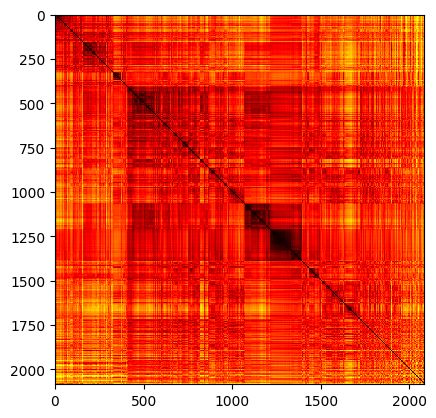

In [23]:
# Función para calcular el estadístico de Hopkins
def hopkins(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        random_point = [uniform(np.amin(X,axis=0)[i], np.amax(X,axis=0)[i]) for i in range(d)]
        u_dist, _ = nbrs.kneighbors(np.array(random_point).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

# Calcular y mostrar el estadístico de Hopkins
H = hopkins(X_procesador)
print('Estadístico de Hopkins:', H)

# Función para calcular y mostrar la matriz VAT
def VAT(R):
    R = np.array(R)
    N, M = R.shape
    if N != M:
        R = squareform(pdist(R))
    J = list(range(0, N))
    
    y = np.max(R, axis=0)
    i = np.argmax(R, axis=0)
    j = np.argmax(y)
    y = np.max(y)
    
    I = i[j]
    del J[I]
    
    y = np.min(R[I,J], axis=0)
    j = np.argmin(R[I,J], axis=0)
    
    I = [I, J[j]]
    J = [e for e in J if e != J[j]]
    
    C = [1,1]
    for r in range(2, N-1):
        y = np.min(R[I,:][:,J], axis=0)
        i = np.argmin(R[I,:][:,J], axis=0)
        j = np.argmin(y)
        y = np.min(y)
        I.extend([J[j]])
        J = [e for e in J if e != J[j]]
        C.extend([i[j]])
    
    y = np.min(R[I,:][:,J], axis=0)
    i = np.argmin(R[I,:][:,J], axis=0)
    
    I.extend(J)
    C.extend(i)
    
    RI = list(range(N))
    for idx, val in enumerate(I):
        RI[val] = idx

    RV = R[I,:][:,I]
    return RV.tolist(), C, I

# Calcular y mostrar la matriz VAT
RV, C, I = VAT(X_procesador)
plt.imshow(RV, cmap='hot', interpolation='nearest')
plt.show()

Se obtiene el algoritmo del indice de Hopkings y el VAT y se usa para mostrar si hay tendencia de clustering. Así mismo, se aprecia que existe una tendencia de clustering en algunos puntos del dataSet, cómo también, se observa que el índice nos da mayor que 0.5, por lo que, se puede decir que si es prudente realizar un proceso de clustering en nuestros datos.

#### Evaluación de modelos de clustering luego del preprocesado de los datos

Vamos a realizar la evaluación de distintos algoritmos de clustering y observar con metricas internas y externas la efectividad de los mismos.

##### Evaluación del algoritmo KMeans:

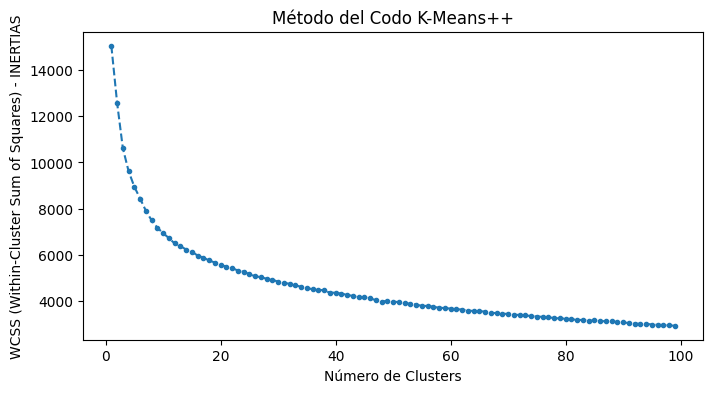

El número óptimo de clústeres es: 16 para K-Means++


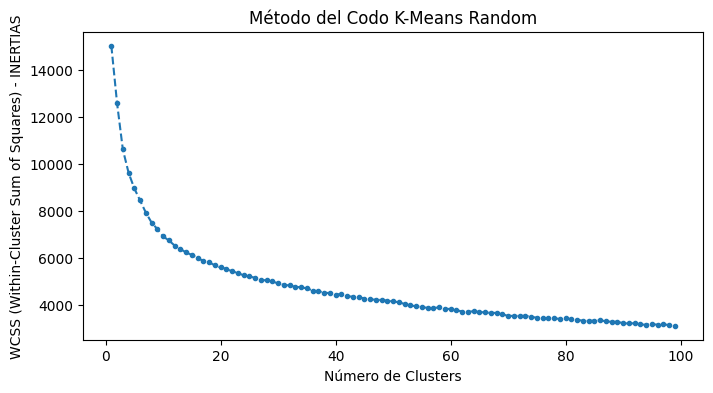

El número óptimo de clústeres es: 19 para K-Means Random


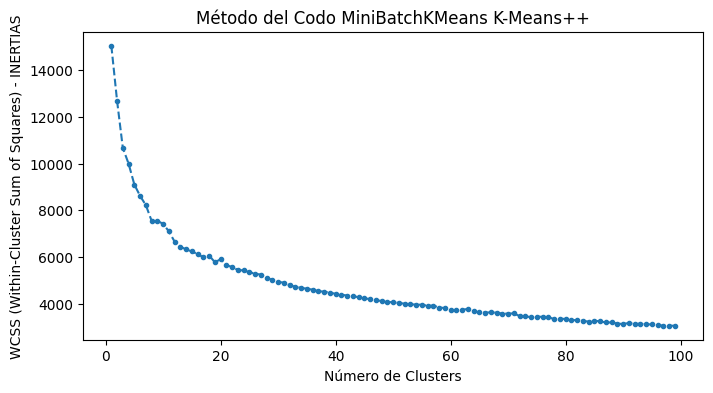

El número óptimo de clústeres es: 17 para MiniBatchKMeans K-Means++


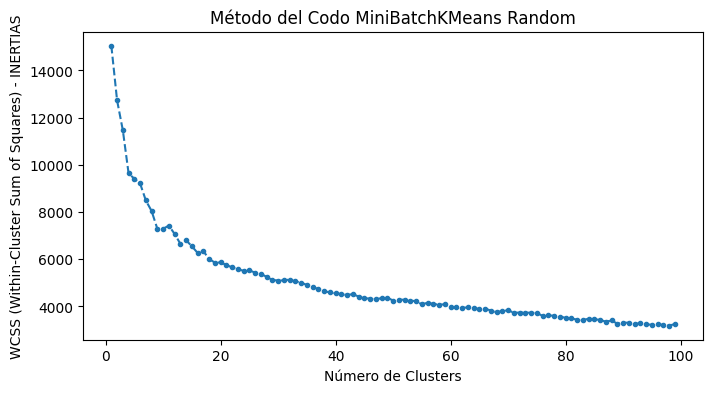

El número óptimo de clústeres es: 9 para MiniBatchKMeans Random


In [24]:
# Probemos el Algoritmo K-Means

os.environ["OMP_NUM_THREADS"] = '1' # Para que no dé warning
warnings.filterwarnings("ignore")
#Obtenemos los distintos valores de K y comparamos por medio de la tecnica del codo

# Aplicar el método del codo para elegir el número óptimo de clústeres
inertias = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_procesador)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 100), inertias, marker='.', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares) - INERTIAS')
plt.title('Método del Codo K-Means++')
plt.show()

kl = KneeLocator(range(1, 100), inertias, curve="convex", direction="decreasing")

print(f"El número óptimo de clústeres es: {kl.elbow} para K-Means++")

# Aplicar el método del codo para elegir el número óptimo de clústeres
inertias = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X_procesador)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 100), inertias, marker='.', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares) - INERTIAS')
plt.title('Método del Codo K-Means Random')
plt.show()

kl = KneeLocator(range(1, 100), inertias, curve="convex", direction="decreasing")

print(f"El número óptimo de clústeres es: {kl.elbow} para K-Means Random")



# Aplicar el método del codo para elegir el número óptimo de clústeres
inertias = []
for i in range(1, 100):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X_procesador)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 100), inertias, marker='.', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares) - INERTIAS')
plt.title('Método del Codo MiniBatchKMeans K-Means++')
plt.show()

kl = KneeLocator(range(1, 100), inertias, curve="convex", direction="decreasing")

print(f"El número óptimo de clústeres es: {kl.elbow} para MiniBatchKMeans K-Means++")

# Aplicar el método del codo para elegir el número óptimo de clústeres
inertias = []
for i in range(1, 100):
    kmeans = MiniBatchKMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(X_procesador)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 100), inertias, marker='.', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares) - INERTIAS')
plt.title('Método del Codo MiniBatchKMeans Random')
plt.show()

kl = KneeLocator(range(1, 100), inertias, curve="convex", direction="decreasing")

print(f"El número óptimo de clústeres es: {kl.elbow} para MiniBatchKMeans Random")

Nota: Lo que se especifica a continuación es en función a la ejecución del método del codo con un rango de 1-15, al momento de usar un rango más grande observamos que nos da una cantidad de clusters mayor, por lo que, el resultado de este método puede variar en función al rango de clustering que usemos si este no es lo suficientemente grande cómo para permitirle al algoritmo detectar el "codo" de nuestras inercias.

Es interesante que, aunque sepamos que tenemos 7 clusters en los cuales se deberían de dividir nuestros datos, directamente este nos recomienda la división de nuestros datos en 4 Clusters.

Por otro lado, al poner a ejecutar el código en un rango de lusters de 1-100 nos damos cuenta de que nos arroja un resultado de 16 clusters cómo el óptimo para nuestro algoritmo de K-Means++ y de 18 para nuestro algoritmo de K-Means_Random.

Para lo que sigue del estudio se evaluaran las métricas internas y externas y observaremos que tan bien logra clasificar nuestro algoritmo KMeans ++ y Random tanto para mi KMeans cómo para mi MiniBatchKMeans.

In [25]:
# Lista de algoritmos de clustering para probar
algoritmos = [
    (KMeans(n_clusters=16, init='k-means++'),'K-Means++'),
    (KMeans(n_clusters=18, init='random'),'K-Means Random'),
    (MiniBatchKMeans(n_clusters=11, init='k-means++'),'MiniBatchKMeans K-Means++'),
    (MiniBatchKMeans(n_clusters=17, init='random'),'MiniBatchKMeans Random')
]


for algoritmo, nombre in algoritmos:
    # Ajustar el algoritmo a los datos
    algoritmo.fit(X_procesador)
    
    # Calcular las etiquetas de cluster
    etiquetas = algoritmo.labels_

    # Calcular las métricas internas
    inercia = algoritmo.inertia_
    silueta = silhouette_score(X_procesador, etiquetas)
    calinski_harabasz = calinski_harabasz_score(X_procesador, etiquetas)
    davies_bouldin = davies_bouldin_score(X_procesador, etiquetas)
    
    # Calcular las métricas externas
    rand_ajustado = metrics.adjusted_rand_score(y, etiquetas)
    fowlkes_mallows = fowlkes_mallows_score(y, etiquetas)
    jaccard = jaccard_score(y, etiquetas, average='macro') # Asegúrate de especificar el parámetro 'average'
    medida_v = v_measure_score(y, etiquetas)
    ami = adjusted_mutual_info_score(y, etiquetas)

    # Crear un diccionario con los resultados
    resultados = {
        'Inercia': inercia,
        'Silueta': silueta,
        'Índice de Calinski Harabasz': calinski_harabasz,
        'Índice de Davies Bouldin': davies_bouldin,
        'Índice de Rand ajustado': rand_ajustado,
        'Índice de Fowlkes-Mallows': fowlkes_mallows,
        'Índice de Jaccard': jaccard,
        'Medida V': medida_v,
        'Información mutua ajustada (AMI)': ami
    }

    # Agregar los resultados al DataFrame
    DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=[nombre]))
    
    # Calcular y mostrar las métricas internas
    print('Métricas internas para', nombre)
    print('Inercia:', inercia)
    print('Silueta:', silueta)
    print('Índice de Calinski Harabasz:', calinski_harabasz)
    print('Índice de Davies Bouldin:', davies_bouldin)
    
    # Calcular y mostrar las métricas externas
    print('\nMétricas externas para', nombre)
    print('Índice de Rand ajustado:', rand_ajustado)
    print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
    print('Índice de Jaccard:', jaccard) # Asegúrate de especificar el parámetro 'average'
    print('Medida V:', medida_v)
    print('Información mutua ajustada (AMI):', ami)
    print('\n')

Métricas internas para K-Means++
Inercia: 5982.484422220651
Silueta: 0.20193995798770917
Índice de Calinski Harabasz: 208.9874028033192
Índice de Davies Bouldin: 1.8054233098554708

Métricas externas para K-Means++
Índice de Rand ajustado: 0.2230701965572069
Índice de Fowlkes-Mallows: 0.31558751639531213
Índice de Jaccard: 0.0172121400671291
Medida V: 0.38806552008475115
Información mutua ajustada (AMI): 0.3821999555002188


Métricas internas para K-Means Random
Inercia: 5801.139231287001
Silueta: 0.2079326458373162
Índice de Calinski Harabasz: 193.782122170647
Índice de Davies Bouldin: 1.794084711273595

Métricas externas para K-Means Random
Índice de Rand ajustado: 0.2181535481234673
Índice de Fowlkes-Mallows: 0.31078889871740756
Índice de Jaccard: 0.01187690371943029
Medida V: 0.37699737992816007
Información mutua ajustada (AMI): 0.3703356076446887


Métricas internas para MiniBatchKMeans K-Means++
Inercia: 7125.157994346116
Silueta: 0.15805904516268487
Índice de Calinski Harabasz: 

De acuerdo con todos los índices estudiados, podemos observar que para la agrupación de nuestros datos el mejor algoritmo entre las variaciones probadas del KMeans termina siendo KMeans Random.

##### Evaluación del algoritmo jerárquico

Métricas internas para ward
Silueta: 0.15658719381692657
Índice de Calinski Harabasz: 389.2270063292272
Índice de Davies Bouldin: 1.8714256073986635
Coeficiente de correlación cophenetic: 0.5201205365361085

Métricas externas para ward
Índice de Rand ajustado: 0.15915116739619464
Índice de Fowlkes-Mallows: 0.3693724808020714
Índice de Jaccard: 0.023464211146649
Medida V: 0.24718442233032736
Información mutua ajustada (AMI): 0.24572955811505703




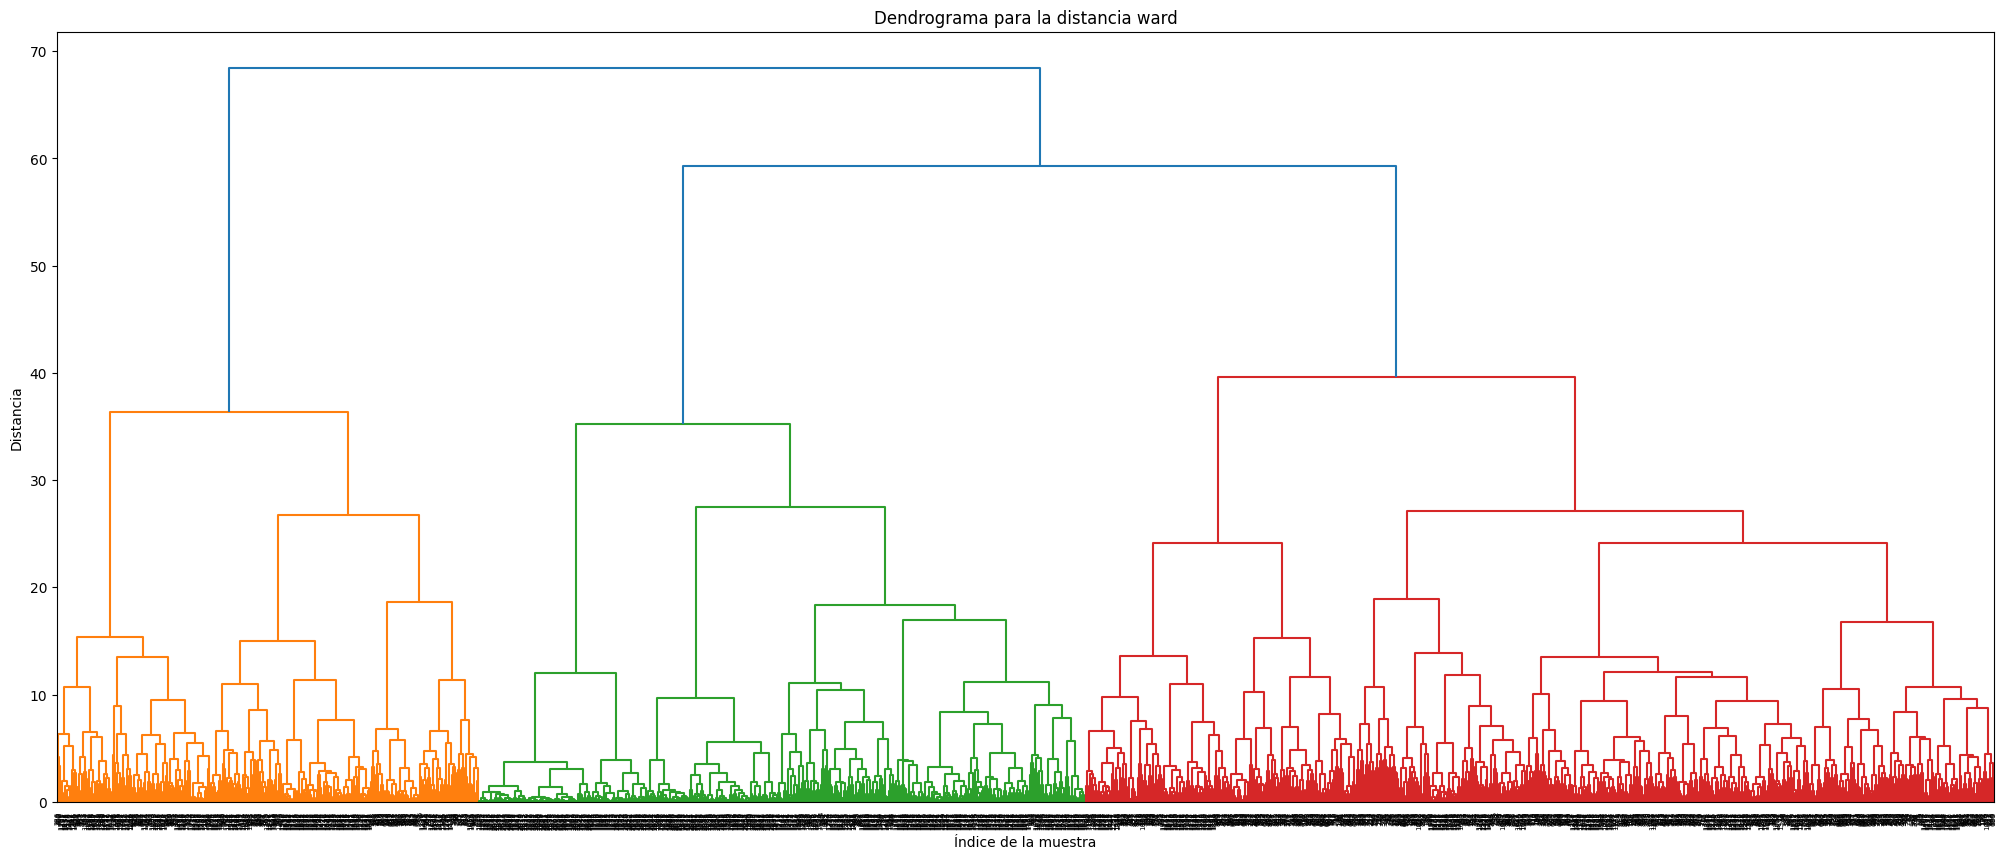

Métricas internas para single
Silueta: 0.4428630479661165
Índice de Calinski Harabasz: 5.711058638895426
Índice de Davies Bouldin: 0.4052048777094308
Coeficiente de correlación cophenetic: 0.6156773400583833

Métricas externas para single
Índice de Rand ajustado: 4.571307318788319e-05
Índice de Fowlkes-Mallows: 0.37865817655080475
Índice de Jaccard: 0.01926240745818481
Medida V: 0.001979946027329355
Información mutua ajustada (AMI): 6.834907982701114e-05




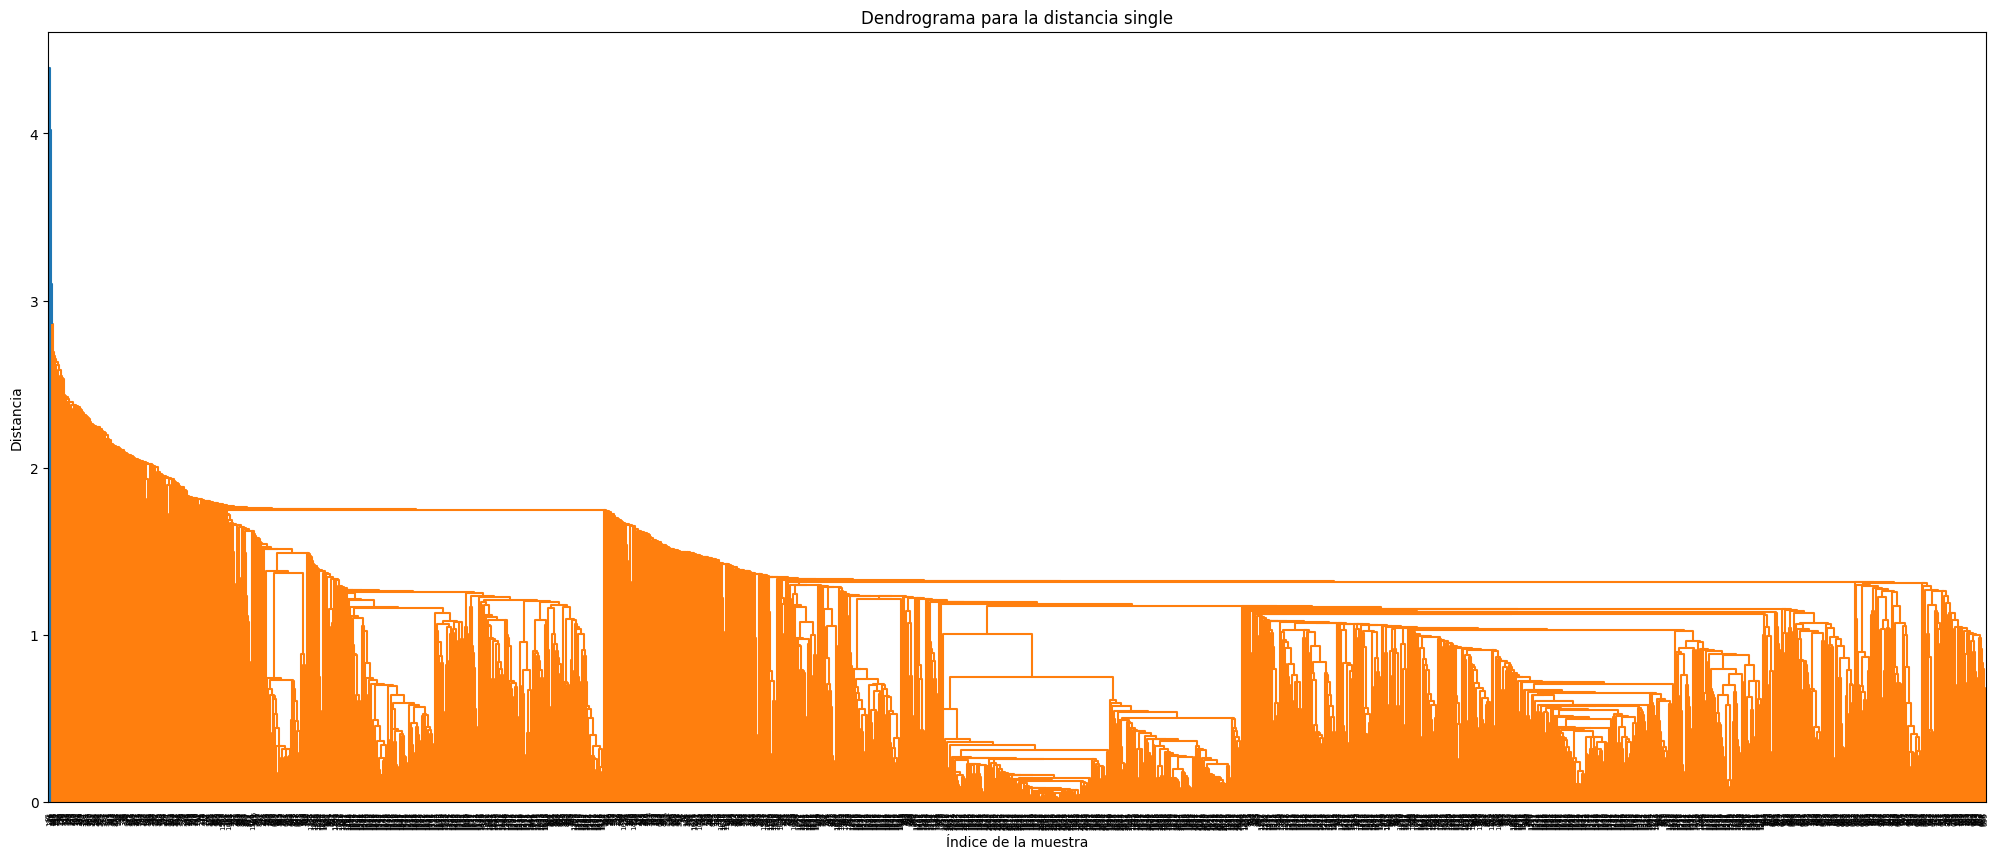

Métricas internas para complete
Silueta: 0.20982788182448986
Índice de Calinski Harabasz: 137.88578744972088
Índice de Davies Bouldin: 1.4183074137031866
Coeficiente de correlación cophenetic: 0.5420523647787093

Métricas externas para complete
Índice de Rand ajustado: 0.007184026698678273
Índice de Fowlkes-Mallows: 0.3480390183474998
Índice de Jaccard: 0.020982582439472923
Medida V: 0.061717484836798946
Información mutua ajustada (AMI): 0.05930283070937016




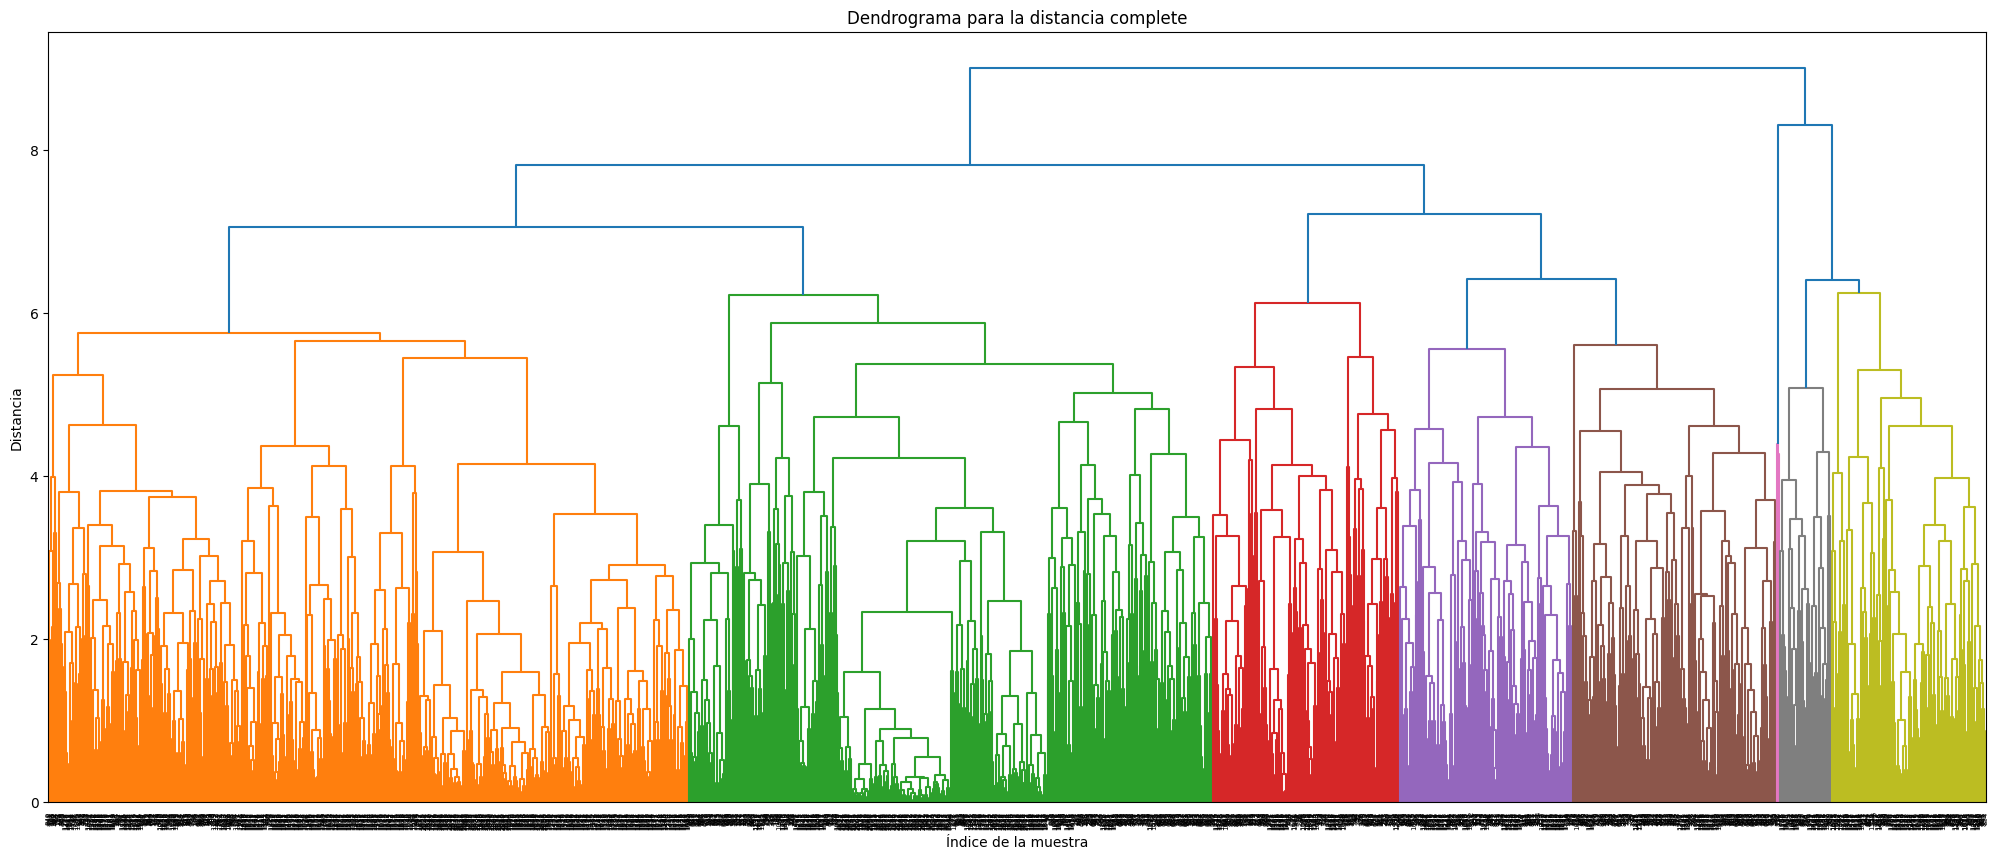

Métricas internas para average
Silueta: 0.29726575625599616
Índice de Calinski Harabasz: 6.597863883225266
Índice de Davies Bouldin: 0.7133027454108628
Coeficiente de correlación cophenetic: 0.6824428544553347

Métricas externas para average
Índice de Rand ajustado: 7.25476454070154e-05
Índice de Fowlkes-Mallows: 0.3785067344244871
Índice de Jaccard: 0.024520165394494576
Medida V: 0.0022906926512763163
Información mutua ajustada (AMI): 1.11368506373015e-05




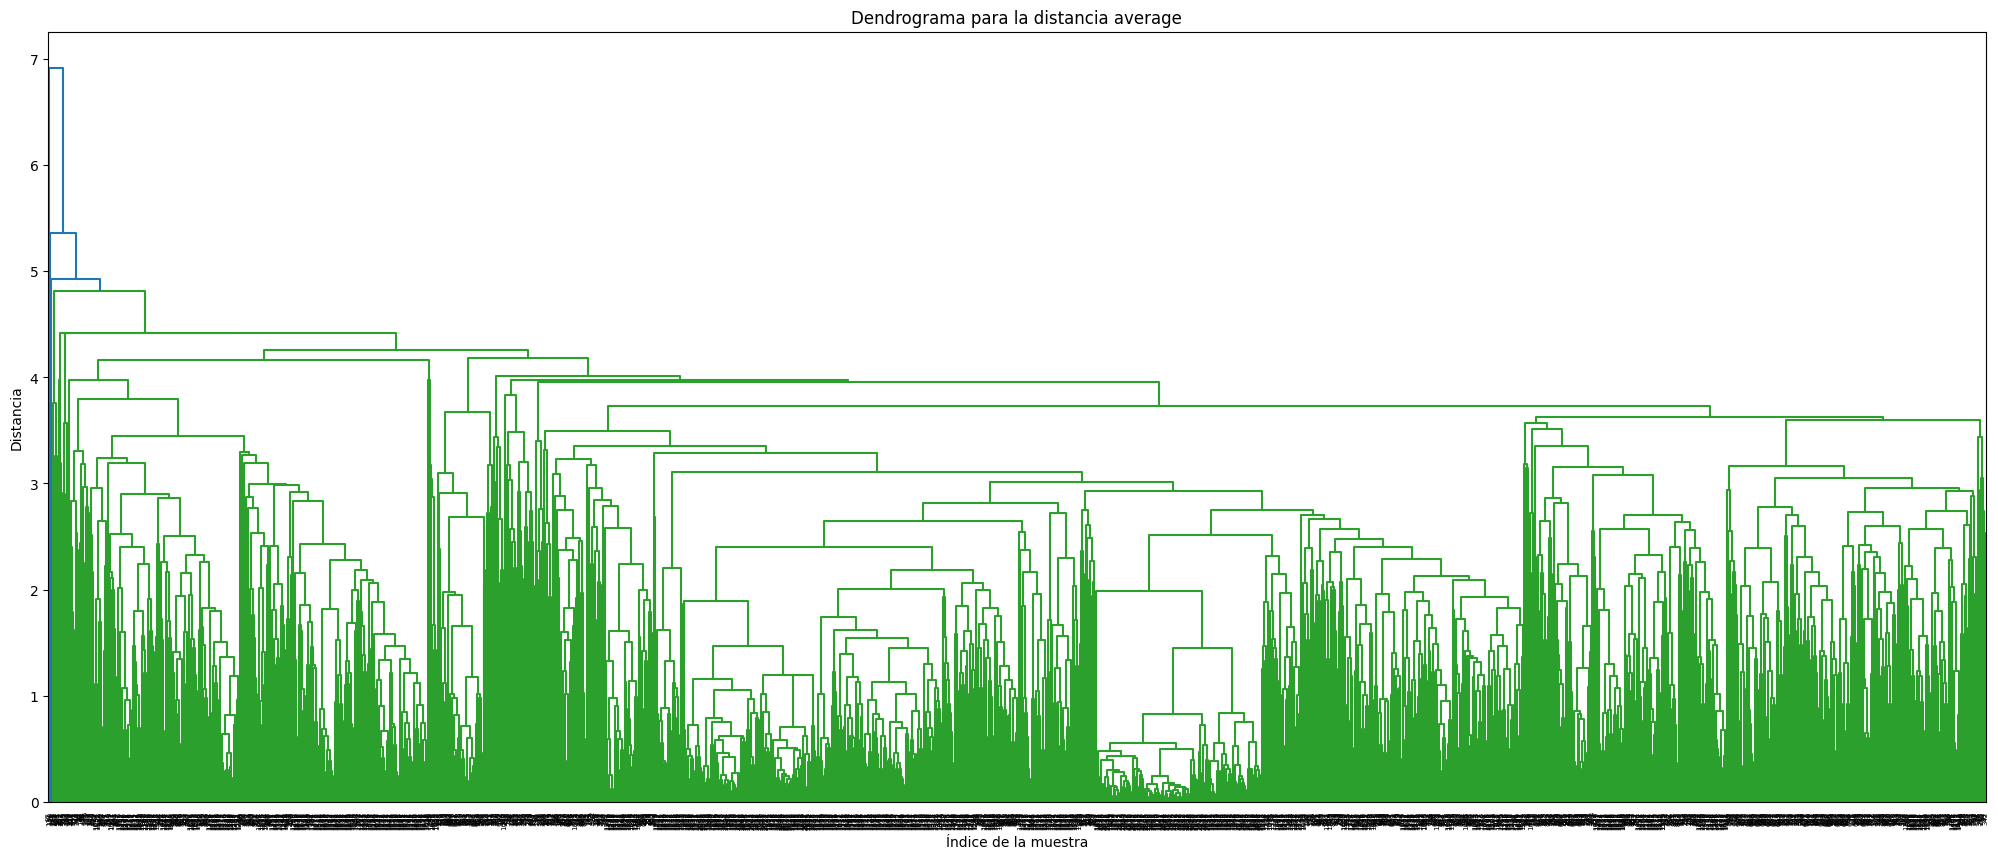

Métricas internas para centroid
Silueta: 0.32843282954850755
Índice de Calinski Harabasz: 23.241144217853446
Índice de Davies Bouldin: 0.8718045889760043
Coeficiente de correlación cophenetic: 0.6524397747559153

Métricas externas para centroid
Índice de Rand ajustado: 0.00013772596534475148
Índice de Fowlkes-Mallows: 0.3762253574249503
Índice de Jaccard: 0.020101432594299456
Medida V: 0.006437044958269009
Información mutua ajustada (AMI): 0.0038425642718237975




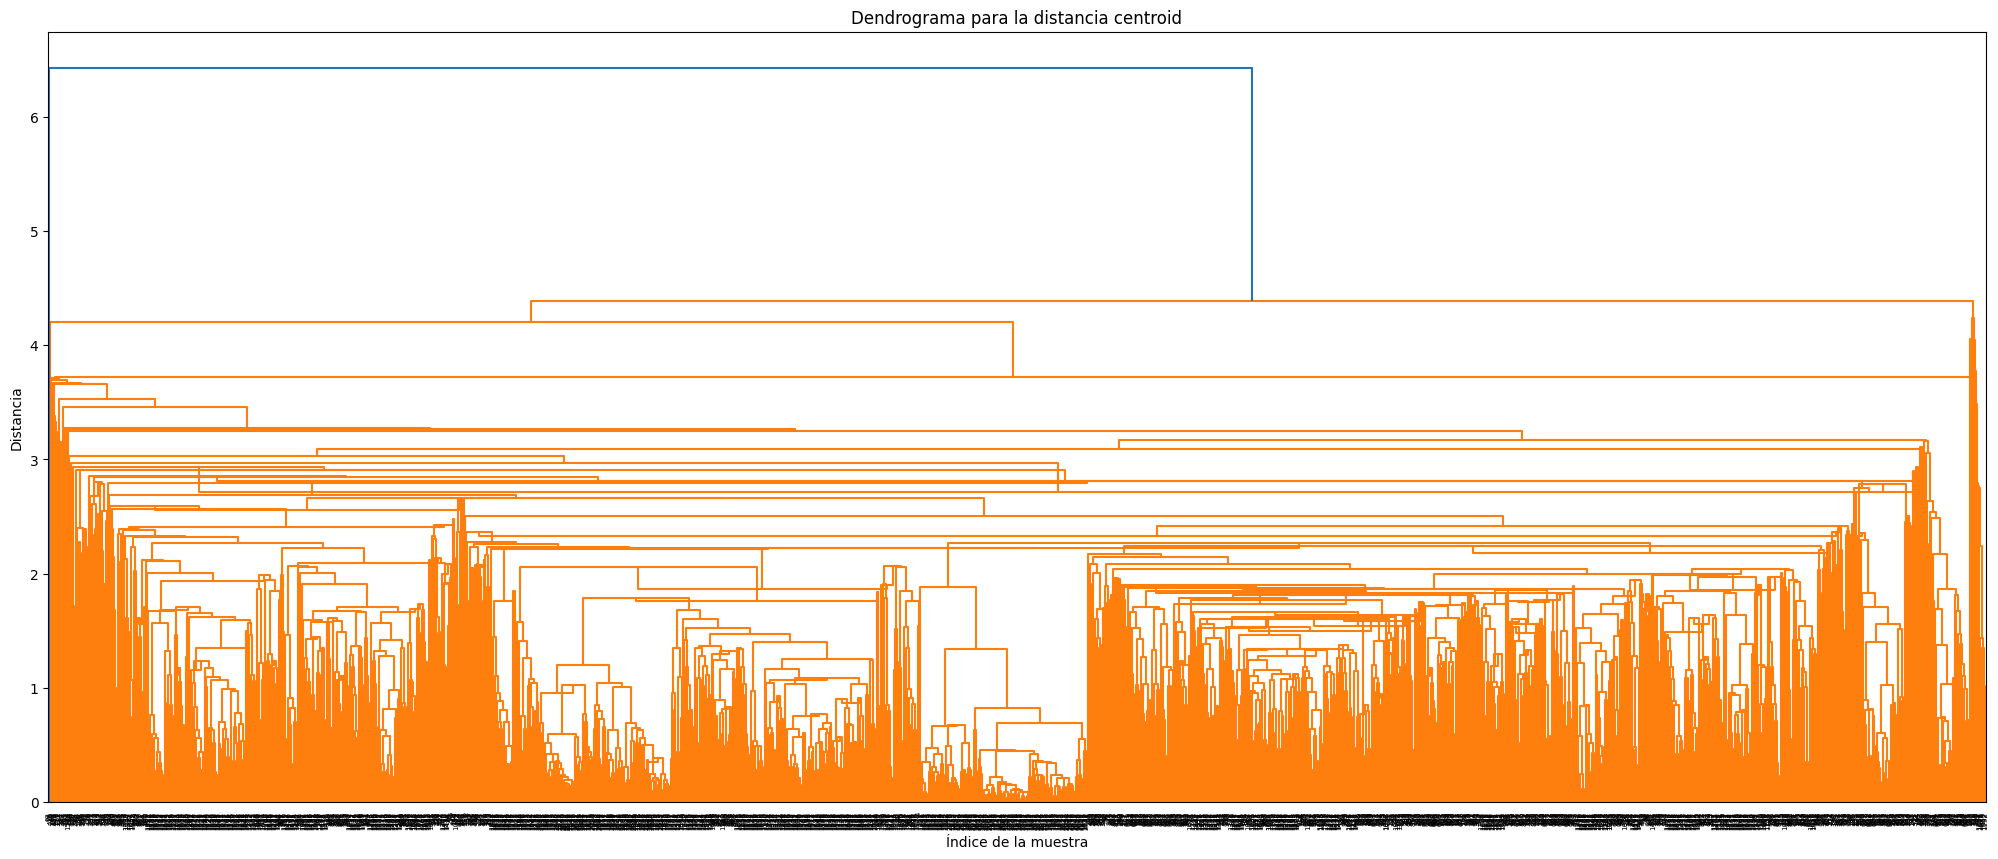

In [26]:

# Definir las distintas distancias que quieres usar
distancias = ['ward', 'single', 'complete', 'average', 'centroid']

for distancia in distancias:
    # Realizar el clustering jerárquico aglomerativo
    Z = linkage(X_procesador, method=distancia)
    
    # Calcular las etiquetas de cluster
    etiquetas = fcluster(Z, 3, criterion='maxclust')

    # Calcular las métricas internas
    silueta = silhouette_score(X_procesador, etiquetas)
    calinski_harabasz = calinski_harabasz_score(X_procesador, etiquetas)
    davies_bouldin = davies_bouldin_score(X_procesador, etiquetas)
    
    # Calcular el coeficiente de correlación cophenetic
    c, coph_dists = cophenet(Z, pdist(X_procesador))
    
    # Calcular las métricas externas
    rand_ajustado = metrics.adjusted_rand_score(y, etiquetas)
    fowlkes_mallows = fowlkes_mallows_score(y, etiquetas)
    jaccard = jaccard_score(y, etiquetas, average='macro') 
    medida_v = v_measure_score(y, etiquetas)
    ami = adjusted_mutual_info_score(y, etiquetas)

    # Crear un diccionario con los resultados
    resultados = {
        'Silueta': silueta,
        'Índice de Calinski Harabasz': calinski_harabasz,
        'Índice de Davies Bouldin': davies_bouldin,
        'Coeficiente de correlación cophenetic': c,
        'Índice de Rand ajustado': rand_ajustado,
        'Índice de Fowlkes-Mallows': fowlkes_mallows,
        'Índice de Jaccard': jaccard,
        'Medida V': medida_v,
        'Información mutua ajustada (AMI)': ami
    }

    # Agregar los resultados al DataFrame
    DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=[ ' Hierarchical'  + distancia]))
    
    # Calcular y mostrar las métricas internas
    print('Métricas internas para', distancia)
    print('Silueta:', silueta)
    print('Índice de Calinski Harabasz:', calinski_harabasz)
    print('Índice de Davies Bouldin:', davies_bouldin)
    
    # Calcular el coeficiente de correlación cophenetic
    print('Coeficiente de correlación cophenetic:', c)
    
    # Calcular y mostrar las métricas externas
    print('\nMétricas externas para', distancia)
    print('Índice de Rand ajustado:', rand_ajustado)
    print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
    print('Índice de Jaccard:', jaccard) 
    print('Medida V:', medida_v)
    print('Información mutua ajustada (AMI):', ami)
    print('\n')
    
    # Crear el dendrograma
    plt.figure(figsize=(25, 10))
    plt.title('Dendrograma para la distancia ' + distancia)
    plt.xlabel('Índice de la muestra')
    plt.ylabel('Distancia')
    dendrogram(Z)
    plt.show()




De acuerdo con los resultados anteriores, nos damos cuenta que, a pesar de que la distancia "Complete" nos da una clasificación de más clusteres, encontramos que las mejores metricas se dan con la distancia "Single". Ahora bien, comparando con el mejor algoritmo de K-Means tenemos:

Métricas internas para K-Means Random:
- Silueta: 0.205963563274636
- Índice de Calinski Harabasz: 194.41175629508552
- Índice de Davies Bouldin: 1.8091972775432776

Métricas internas para single:
- Silueta: 0.4428630479661165
- Índice de Calinski Harabasz: 5.711058638895426
- Índice de Davies Bouldin: 0.4052048777094308


Métricas externas para K-Means Random:
- Índice de Rand ajustado: 0.22902822268241804
- Índice de Fowlkes-Mallows: 0.32165661548924485
- Índice de Jaccard: 0.014599508884600647
- Medida V: 0.40351735121054344
- Información mutua ajustada (AMI): 0.39720154723932244


Métricas externas para single:
- Índice de Rand ajustado: 4.571307318788319e-05
- Índice de Fowlkes-Mallows: 0.37865817655080475
- Índice de Jaccard: 0.01926240745818481
- Medida V: 0.001979946027329355
- Información mutua ajustada (AMI): 6.834907982701114e-05


El algoritmo de clustering aglomerativo con distancia Single podría llegar a agrupar un poco mejor nuestros datos en comparación al algoritmo K-Means, sin embargo, hay algunas métricas que son contradictorias entre si.


##### Evaluación del algoritmo DBSCAN

In [27]:
# Definir los distintos valores de eps y min_samples que quieres usar
eps_valores = [2,3,4]
min_samples_valores = [5, 10, 15, 20]

for eps in eps_valores:
    for min_samples in min_samples_valores:
        # Crear una instancia del algoritmo
        algoritmo = DBSCAN(eps=eps, min_samples=min_samples)

        # Ajustar el algoritmo a los datos
        algoritmo.fit(X_procesador)

        # Calcular las etiquetas de cluster
        etiquetas = algoritmo.labels_

        # Calcular las métricas internas
        silueta = silhouette_score(X_procesador, etiquetas)
        calinski_harabasz = calinski_harabasz_score(X_procesador, etiquetas)
        davies_bouldin = davies_bouldin_score(X_procesador, etiquetas)

        # Calcular las métricas externas
        rand_ajustado = metrics.adjusted_rand_score(y, etiquetas)
        fowlkes_mallows = fowlkes_mallows_score(y, etiquetas)
        jaccard = jaccard_score(y, etiquetas, average='macro') 
        medida_v = v_measure_score(y, etiquetas)
        ami = adjusted_mutual_info_score(y, etiquetas)

        # Crear un diccionario con los resultados
        resultados = {
            'Silueta': silueta,
            'Índice de Calinski Harabasz': calinski_harabasz,
            'Índice de Davies Bouldin': davies_bouldin,
            'Índice de Rand ajustado': rand_ajustado,
            'Índice de Fowlkes-Mallows': fowlkes_mallows,
            'Índice de Jaccard': jaccard,
            'Medida V': medida_v,
            'Información mutua ajustada (AMI)': ami
        }

        # Agregar los resultados al DataFrame
        DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=['DBSCAN eps=' + str(eps) + ' min_samples=' + str(min_samples)]))

        # Mostrar las métricas internas
        print('Métricas internas para DBSCAN con eps =', eps, 'y min_samples =', min_samples)
        print('Silueta:', silueta)
        print('Índice de Calinski Harabasz:', calinski_harabasz)
        print('Índice de Davies Bouldin:', davies_bouldin)

        # Mostrar las métricas externas
        print('\nMétricas externas para DBSCAN con eps =', eps, 'y min_samples =', min_samples)
        print('Índice de Rand ajustado:', rand_ajustado)
        print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
        print('Índice de Jaccard:', jaccard) 
        print('Medida V:', medida_v)
        print('Información mutua ajustada (AMI):', ami)
        print('\n')

Métricas internas para DBSCAN con eps = 2 y min_samples = 5
Silueta: 0.18922054380124045
Índice de Calinski Harabasz: 25.926659453962646
Índice de Davies Bouldin: 4.734044362781263

Métricas externas para DBSCAN con eps = 2 y min_samples = 5
Índice de Rand ajustado: 0.005636697899494113
Índice de Fowlkes-Mallows: 0.3636055471469431
Índice de Jaccard: 0.01649746192893401
Medida V: 0.0356732932232144
Información mutua ajustada (AMI): 0.034374696396174804


Métricas internas para DBSCAN con eps = 2 y min_samples = 10
Silueta: 0.1819980026534392
Índice de Calinski Harabasz: 26.00682586437074
Índice de Davies Bouldin: 4.981613309715142

Métricas externas para DBSCAN con eps = 2 y min_samples = 10
Índice de Rand ajustado: 0.007208037973092962
Índice de Fowlkes-Mallows: 0.3625674828573636
Índice de Jaccard: 0.01656010230179028
Medida V: 0.04169830741867552
Información mutua ajustada (AMI): 0.04042191102258719


Métricas internas para DBSCAN con eps = 2 y min_samples = 15
Silueta: 0.1806565862

Aunque al parecer el DBSCAN no logra hacer un clustering que explique la agrupación de nuestros datos, obtenemos que la mejor agrupación en función de nuestras metricas internas es el DBSCAN de Epsilon 2 y min samples 5.

##### Evaluación del algoritmo MeanShift

In [28]:
# Definir los distintos valores de bandwidth que quieres usar
bandwidth_valores = [0.5, 1, 1.5, 2]

for bandwidth in bandwidth_valores:
    # Crear una instancia del algoritmo
    algoritmo = MeanShift(bandwidth=bandwidth)

    # Ajustar el algoritmo a los datos
    algoritmo.fit(X_procesador)

    # Calcular las etiquetas de cluster
    etiquetas = algoritmo.labels_

    # Calcular las métricas internas
    silueta = silhouette_score(X_procesador, etiquetas)
    calinski_harabasz = calinski_harabasz_score(X_procesador, etiquetas)
    davies_bouldin = davies_bouldin_score(X_procesador, etiquetas)

    # Calcular las métricas externas
    rand_ajustado = metrics.adjusted_rand_score(y, etiquetas)
    fowlkes_mallows = fowlkes_mallows_score(y, etiquetas)
    jaccard = jaccard_score(y, etiquetas, average='macro') 
    medida_v = v_measure_score(y, etiquetas)
    ami = adjusted_mutual_info_score(y, etiquetas)

    # Crear un diccionario con los resultados
    resultados = {
        'Silueta': silueta,
        'Índice de Calinski Harabasz': calinski_harabasz,
        'Índice de Davies Bouldin': davies_bouldin,
        'Índice de Rand ajustado': rand_ajustado,
        'Índice de Fowlkes-Mallows': fowlkes_mallows,
        'Índice de Jaccard': jaccard,
        'Medida V': medida_v,
        'Información mutua ajustada (AMI)': ami
    }

    # Agregar los resultados al DataFrame
    DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=['MeanShift bandwidth=' + str(bandwidth)]))

    # Mostrar las métricas internas
    print('Métricas internas para MeanShift con bandwidth =', bandwidth)
    print('Silueta:', silueta)
    print('Índice de Calinski Harabasz:', calinski_harabasz)
    print('Índice de Davies Bouldin:', davies_bouldin)

    # Mostrar las métricas externas
    print('Métricas externas para MeanShift con bandwidth =', bandwidth)
    print('Índice de Rand ajustado:', rand_ajustado)
    print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
    print('Índice de Jaccard:', jaccard) 
    print('Medida V:', medida_v)
    print('Información mutua ajustada (AMI):', ami)
    print('\n')

Métricas internas para MeanShift con bandwidth = 0.5
Silueta: 0.20319328384731009
Índice de Calinski Harabasz: 95.554817475513
Índice de Davies Bouldin: 0.2630746081530256
Métricas externas para MeanShift con bandwidth = 0.5
Índice de Rand ajustado: 0.05171845216835292
Índice de Fowlkes-Mallows: 0.17567043679829833
Índice de Jaccard: 5.786869592893724e-05
Medida V: 0.4539595977088292
Información mutua ajustada (AMI): 0.21340762285750564


Métricas internas para MeanShift con bandwidth = 1
Silueta: 0.218644134040452
Índice de Calinski Harabasz: 34.107668939341735
Índice de Davies Bouldin: 0.4989351721981755
Métricas externas para MeanShift con bandwidth = 1
Índice de Rand ajustado: 0.16113397233248294
Índice de Fowlkes-Mallows: 0.31061536052794864
Índice de Jaccard: 0.0002471315092674316
Medida V: 0.493665646992023
Información mutua ajustada (AMI): 0.3586219067914766


Métricas internas para MeanShift con bandwidth = 1.5
Silueta: 0.16422393268703656
Índice de Calinski Harabasz: 25.40191

##### Evaluación del algoritmo Spectral Clustering

In [29]:
# Crear una instancia del algoritmo
algoritmo = SpectralClustering(n_clusters=7)

# Ajustar el algoritmo a los datos
algoritmo.fit(X_procesador)

# Calcular las etiquetas de cluster
etiquetas = algoritmo.labels_

# Calcular las métricas internas
silueta = silhouette_score(X_procesador, etiquetas)
calinski_harabasz = calinski_harabasz_score(X_procesador, etiquetas)
davies_bouldin = davies_bouldin_score(X_procesador, etiquetas)

# Calcular las métricas externas
rand_ajustado = metrics.adjusted_rand_score(y, etiquetas)
fowlkes_mallows = fowlkes_mallows_score(y, etiquetas)
jaccard = jaccard_score(y, etiquetas, average='macro') 
medida_v = v_measure_score(y, etiquetas)
ami = adjusted_mutual_info_score(y, etiquetas)

# Crear un diccionario con los resultados
resultados = {
    'Silueta': silueta,
    'Índice de Calinski Harabasz': calinski_harabasz,
    'Índice de Davies Bouldin': davies_bouldin,
    'Índice de Rand ajustado': rand_ajustado,
    'Índice de Fowlkes-Mallows': fowlkes_mallows,
    'Índice de Jaccard': jaccard,
    'Medida V': medida_v,
    'Información mutua ajustada (AMI)': ami
}

# Agregar los resultados al DataFrame
DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=['SpectralClustering n_clusters=7']))

# Mostrar las métricas internas
print('Métricas internas para SpectralClustering con n_clusters = 7')
print('Silueta:', silueta)
print('Índice de Calinski Harabasz:', calinski_harabasz)
print('Índice de Davies Bouldin:', davies_bouldin)

# Mostrar las métricas externas
print('Métricas externas para SpectralClustering con n_clusters = 7')
print('Índice de Rand ajustado:', rand_ajustado)
print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
print('Índice de Jaccard:', jaccard) 
print('Medida V:', medida_v)
print('Información mutua ajustada (AMI):', ami)
print('\n')

Métricas internas para SpectralClustering con n_clusters = 7
Silueta: 0.1436064975052212
Índice de Calinski Harabasz: 225.00811394168875
Índice de Davies Bouldin: 1.9774797574932048
Métricas externas para SpectralClustering con n_clusters = 7
Índice de Rand ajustado: 0.15436600407098156
Índice de Fowlkes-Mallows: 0.324777437924608
Índice de Jaccard: 0.06637802170153984
Medida V: 0.25462003162224106
Información mutua ajustada (AMI): 0.2508589270602502




##### KMeans con ajuste en etiquetas:
Por último, se va a usar un método programado en la practica 3 para seleccionar y asignar etiquetas a clusters cuando nuestro método de KMeans nos indica que el valor de clustering es mayor a la cantidad de etiquetas que poseemos originalmente en nuestro DataSet. Esto lo haremos con la intención de intentar mejorar un poco las métricas externas y no tanto las internas.

Sin embargo, teniendo en cuenta que en un problema en donde se busque clasificar a las personas e indicar si están o no con algún tipo de obesidad, esto no nos servirá.

In [30]:
# Lista de algoritmos de clustering para probar
algoritmos = [
    (KMeans(n_clusters=16, init='k-means++'),'K-Means++ Etiquetas Ajustadas'),
    (KMeans(n_clusters=18, init='random'),'K-Means Random Etiquetas Ajustadas'),
    (MiniBatchKMeans(n_clusters=11, init='k-means++'),'MiniBatchKMeans K-Means++ Etiquetas Ajustadas'),
    (MiniBatchKMeans(n_clusters=17, init='random'),'MiniBatchKMeans Random Etiquetas Ajustadas')
]

def asignar_etiquetas_a_clusters(etiquetas_reales, etiquetas_clusters,numeroClusters):
    etiquetas_asignadas = np.zeros_like(etiquetas_clusters)
    etiquetasRelacion = np.zeros(numeroClusters)
    for cluster in np.unique(etiquetas_clusters):
        mascara_cluster = etiquetas_clusters == cluster
        etiquetas_imagenes_cluster = etiquetas_reales[mascara_cluster]
        etiqueta_mas_comun = np.bincount(etiquetas_imagenes_cluster).argmax()
        etiquetas_asignadas[mascara_cluster] = etiqueta_mas_comun
        etiquetasRelacion[cluster] = etiqueta_mas_comun
    print(f"Esto es el len de los valores unicos {len(np.unique(etiquetas_clusters))}")
    return (etiquetas_asignadas,etiquetasRelacion[:len(np.unique(etiquetas_clusters))])

for algoritmo, nombre in algoritmos:
    # Ajustar el algoritmo a los datos
    algoritmo.fit(X_procesador)
    
    # Calcular las etiquetas de cluster haciendo un ajuste de las etiquetas con relación a las reales
    etiquetas,_ = asignar_etiquetas_a_clusters(y, algoritmo.labels_,algoritmo.n_clusters)
    
    # Calcular las métricas internas
    inercia = algoritmo.inertia_
    silueta = silhouette_score(X_procesador, etiquetas)
    calinski_harabasz = calinski_harabasz_score(X_procesador, etiquetas)
    davies_bouldin = davies_bouldin_score(X_procesador, etiquetas)
    
    # Calcular las métricas externas
    rand_ajustado = metrics.adjusted_rand_score(y, etiquetas)
    fowlkes_mallows = fowlkes_mallows_score(y, etiquetas)
    jaccard = jaccard_score(y, etiquetas, average='macro') # Asegúrate de especificar el parámetro 'average'
    medida_v = v_measure_score(y, etiquetas)
    ami = adjusted_mutual_info_score(y, etiquetas)

    # Crear un diccionario con los resultados
    resultados = {
        'Inercia': inercia,
        'Silueta': silueta,
        'Índice de Calinski Harabasz': calinski_harabasz,
        'Índice de Davies Bouldin': davies_bouldin,
        'Índice de Rand ajustado': rand_ajustado,
        'Índice de Fowlkes-Mallows': fowlkes_mallows,
        'Índice de Jaccard': jaccard,
        'Medida V': medida_v,
        'Información mutua ajustada (AMI)': ami
    }

    # Agregar los resultados al DataFrame
    DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=[nombre]))
    
    # Calcular y mostrar las métricas internas
    print('Métricas internas para', nombre)
    print('Inercia:', inercia)
    print('Silueta:', silueta)
    print('Índice de Calinski Harabasz:', calinski_harabasz)
    print('Índice de Davies Bouldin:', davies_bouldin)
    
    # Calcular y mostrar las métricas externas
    print('\nMétricas externas para', nombre)
    print('Índice de Rand ajustado:', rand_ajustado)
    print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
    print('Índice de Jaccard:', jaccard) # Asegúrate de especificar el parámetro 'average'
    print('Medida V:', medida_v)
    print('Información mutua ajustada (AMI):', ami)
    print('\n')

Esto es el len de los valores unicos 16
Métricas internas para K-Means++ Etiquetas Ajustadas
Inercia: 5980.324055002378
Silueta: 0.06284375087430705
Índice de Calinski Harabasz: 140.39734618084378
Índice de Davies Bouldin: 3.5754032509046465

Métricas externas para K-Means++ Etiquetas Ajustadas
Índice de Rand ajustado: 0.3686172077776736
Índice de Fowlkes-Mallows: 0.4712584668823785
Índice de Jaccard: 0.38563486328200985
Medida V: 0.4416391427131606
Información mutua ajustada (AMI): 0.43944740816473443


Esto es el len de los valores unicos 18
Métricas internas para K-Means Random Etiquetas Ajustadas
Inercia: 5804.458326970045
Silueta: 0.07762519465717652
Índice de Calinski Harabasz: 131.07602206891548
Índice de Davies Bouldin: 3.3291562321073656

Métricas externas para K-Means Random Etiquetas Ajustadas
Índice de Rand ajustado: 0.36442317330269913
Índice de Fowlkes-Mallows: 0.46160363893815254
Índice de Jaccard: 0.3892336154255408
Medida V: 0.41945573980958445
Información mutua ajusta

##### Usando el algoritmo MiniSom:

Se realiza uso del algoritmo MiniSom para intentar obtener unas métricas un poco mejores en relación con las obtenidas anteriormente en las otras estrategias. La explicación del algoritmo se puede encontrar en [https://www.youtube.com/watch?v=LiBG3eRhHik&ab_channel=ElprofEstudiante].

In [31]:
# Convertir DataFrame a array de NumPy
X_procesador_np = X_procesador.values

# inicializar SOM
som = MiniSom(14, 2, X_procesador_np.shape[1], sigma=0.5, learning_rate=0.5, random_seed=42)

# entrenar SOM
som.train_random(X_procesador_np, 100)

# obtener los clusters
clusters = {}
for i, x in enumerate(X_procesador_np):
    w = som.winner(x)
    if w not in clusters:
        clusters[w] = []
    clusters[w].append(i)

# Convertir las etiquetas de cluster a una lista para usar con las métricas
etiquetas = [som.winner(x) for x in X_procesador_np]

# Convertir las coordenadas bidimensionales en cadenas
etiquetas_str = [str(e) for e in etiquetas]

# Crear un LabelEncoder
le = LabelEncoder()

# Ajustar el LabelEncoder a las etiquetas y transformar las etiquetas
etiquetas_num = le.fit_transform(etiquetas_str)

# Ahora etiquetas_num contiene etiquetas unidimensionales para tus clusters

# Calcular las métricas internas
silueta = silhouette_score(X_procesador_np, etiquetas_num)
calinski_harabasz = calinski_harabasz_score(X_procesador_np, etiquetas_num)
davies_bouldin = davies_bouldin_score(X_procesador_np, etiquetas_num)

# Calcular las métricas externas
rand_ajustado = metrics.adjusted_rand_score(y, etiquetas_num)
fowlkes_mallows = fowlkes_mallows_score(y, etiquetas_num)
jaccard = jaccard_score(y, etiquetas_num, average='macro') 
medida_v = v_measure_score(y, etiquetas_num)
ami = adjusted_mutual_info_score(y, etiquetas_num)

# Crear un diccionario con los resultados
resultados = {
    'Silueta': silueta,
    'Índice de Calinski Harabasz': calinski_harabasz,
    'Índice de Davies Bouldin': davies_bouldin,
    'Índice de Rand ajustado': rand_ajustado,
    'Índice de Fowlkes-Mallows': fowlkes_mallows,
    'Índice de Jaccard': jaccard,
    'Medida V': medida_v,
    'Información mutua ajustada (AMI)': ami
}

# Agregar los resultados al DataFrame
DatosAlgoritmos = DatosAlgoritmos.append(pd.DataFrame([resultados], index=['SOM']))

# Mostrar las métricas internas
print('Métricas internas para SOM')
print('Silueta:', silueta)
print('Índice de Calinski Harabasz:', calinski_harabasz)
print('Índice de Davies Bouldin:', davies_bouldin)

# Mostrar las métricas externas
print('\nMétricas externas para SOM')
print('Índice de Rand ajustado:', rand_ajustado)
print('Índice de Fowlkes-Mallows:', fowlkes_mallows)
print('Índice de Jaccard:', jaccard) 
print('Medida V:', medida_v)
print('Información mutua ajustada (AMI):', ami)
print('\n')

Métricas internas para SOM
Silueta: 0.10834839613266953
Índice de Calinski Harabasz: 142.73486500334428
Índice de Davies Bouldin: 1.8184199482064203

Métricas externas para SOM
Índice de Rand ajustado: 0.041706761246784484
Índice de Fowlkes-Mallows: 0.31202684398519503
Índice de Jaccard: 0.053410941272158965
Medida V: 0.08635781866154241
Información mutua ajustada (AMI): 0.08383516538886446




##### Resumen de resultados:

Finalmente, realizamos una evaluación y recopilación de todos los resultados obtenidos en cada una de las pruebas realizadas para incluirlas en un DataFrame y poder visualizar mejor los datos:

<center>

<img src="ResumenEvalModelos.jpg" alt="" width="60%"/>

</center>

In [33]:
DatosAlgoritmos

,Inercia,Silueta,Índice de Calinski Harabasz,Índice de Davies Bouldin,Índice de Rand ajustado,Índice de Fowlkes-Mallows,Índice de Jaccard,Medida V,Información mutua ajustada (AMI),Coeficiente de correlación cophenetic
K-Means++,5982.484422,0.201940,208.987403,1.805423,0.223070,0.315588,0.017212,0.388066,0.382200,NaN
K-Means Random,5801.139231,0.207933,193.782122,1.794085,0.218154,0.310789,0.011877,0.376997,0.370336,NaN
MiniBatchKMeans K-Means++,7125.157994,0.158059,231.938571,1.906840,0.246318,0.341911,0.009639,0.339672,0.335137,NaN
MiniBatchKMeans Random,6160.903661,0.187859,189.932583,1.948500,0.211974,0.304855,0.007556,0.354314,0.347836,NaN
Hierarchicalward,NaN,0.156587,389.227006,1.871426,0.159151,0.369372,0.023464,0.247184,0.245730,0.520121
Hierarchicalsingle,NaN,0.442863,5.711059,0.405205,0.000046,0.378658,0.019262,0.001980,0.000068,0.615677
Hierarchicalcomplete,NaN,0.209828,137.885787,1.418307,0.007184,0.348039,0.020983,0.061717,0.059303,0.542052
Hierarchicalaverage,NaN,0.297266,6.597864,0.713303,0.000073,0.378507,0.024520,0.002291,0.000011,0.682443
Hierarchicalcentroid,NaN,0.328433,23.241144,0.871805,0.000138,0.376225,0.020101,0.006437,0.003843,0.652440
DBSCAN eps=2 min_samples=5,NaN,0.189221,25.926659,4.734044,0.005637,0.363606,0.016497,0.035673,0.034375,NaN


In [34]:
# Crear un DataFrame para almacenar los resultados
resultados = pd.DataFrame(index=DatosAlgoritmos.index)

# Calcular el mejor algoritmo para cada índice
resultados['Silueta'] = DatosAlgoritmos['Silueta'] == DatosAlgoritmos['Silueta'].max()
resultados['Índice de Calinski Harabasz'] = DatosAlgoritmos['Índice de Calinski Harabasz'] == DatosAlgoritmos['Índice de Calinski Harabasz'].max()
resultados['Índice de Davies Bouldin'] = DatosAlgoritmos['Índice de Davies Bouldin'] == DatosAlgoritmos['Índice de Davies Bouldin'].min()
resultados['Índice de Rand ajustado'] = DatosAlgoritmos['Índice de Rand ajustado'] == DatosAlgoritmos['Índice de Rand ajustado'].max()
resultados['Índice de Fowlkes-Mallows'] = DatosAlgoritmos['Índice de Fowlkes-Mallows'] == DatosAlgoritmos['Índice de Fowlkes-Mallows'].max()
resultados['Índice de Jaccard'] = DatosAlgoritmos['Índice de Jaccard'] == DatosAlgoritmos['Índice de Jaccard'].max()
resultados['Medida V'] = DatosAlgoritmos['Medida V'] == DatosAlgoritmos['Medida V'].max()
resultados['Información mutua ajustada (AMI)'] = DatosAlgoritmos['Información mutua ajustada (AMI)'] == DatosAlgoritmos['Información mutua ajustada (AMI)'].max()

# Convertir los valores booleanos a enteros
resultados = resultados.astype(int)

# Sumar los puntos para cada algoritmo
resultados['Puntos'] = resultados.sum(axis=1)

# Encontrar el algoritmo con la mayor cantidad de puntos
mejor_algoritmo = resultados['Puntos'].idxmax()

print('El mejor algoritmo es:', mejor_algoritmo)

El mejor algoritmo es: K-Means++ Etiquetas Ajustadas
